### Importing required libraries

In [1]:
import pandas as pd

### Importing dataset

In [2]:
df = pd.read_excel('dataset/titanic_full.xls')


### dataset View

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Dataset Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


### Missing Values

In [6]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [16]:
 # convert categorical variable to numerical

In [7]:
df['male'] = (df['sex'] == 'male')*1

In [8]:
df['lifeboat'] = df.boat.notnull()*1

In [9]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,male,lifeboat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0


In [13]:
df = df.drop('home.dest',axis=1)

In [16]:
df['total_cabin'] = df.cabin.str.count(' ') +1
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,male,lifeboat,total_cabin
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,0,1,1.0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,1,1,2.0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,0,0,2.0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,1,0,2.0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,0,0,2.0


In [21]:
tempdf = df.copy()


In [27]:
df.total_cabin = df.total_cabin.fillna(0)

In [30]:
df = df.drop('body',axis =1)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,male,lifeboat,total_cabin
0,1,1,female,29.0000,0,0,24160,211.3375,S,2,0,1,1.0
1,1,1,male,0.9167,1,2,113781,151.5500,S,11,1,1,2.0
2,1,0,female,2.0000,1,2,113781,151.5500,S,NaN,0,0,2.0
3,1,0,male,30.0000,1,2,113781,151.5500,S,NaN,1,0,2.0
4,1,0,female,25.0000,1,2,113781,151.5500,S,NaN,0,0,2.0


In [31]:
embarked_encoded = pd.get_dummies(df.embarked, prefix='embarked',drop_first = True)


,embarked_Q,embarked_S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1304,0,0
1305,0,0
1306,0,0
1307,0,0


In [32]:
df = pd.concat([df,embarked_encoded], axis = 1)

In [45]:
df.drop('boat',axis=1,inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       1309 non-null   int64  
 1   survived     1309 non-null   int64  
 2   age          1046 non-null   float64
 3   sibsp        1309 non-null   int64  
 4   parch        1309 non-null   int64  
 5   fare         1308 non-null   float64
 6   male         1309 non-null   int32  
 7   lifeboat     1309 non-null   int32  
 8   total_cabin  1309 non-null   float64
 9   embarked_Q   1309 non-null   uint8  
 10  embarked_S   1309 non-null   uint8  
dtypes: float64(3), int32(2), int64(4), uint8(2)
memory usage: 84.5 KB


In [47]:
df.isnull().sum()

pclass           0
survived         0
age            263
sibsp            0
parch            0
fare             1
male             0
lifeboat         0
total_cabin      0
embarked_Q       0
embarked_S       0
dtype: int64

In [54]:
df.fare = df.fare.fillna(0)
df.fare.isnull().sum()

0

In [48]:
## now we will fill the missing value of age column with the help of a ML model

In [55]:
df.age.isnull().sum()

263

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
#create train and test 
train_data = df[df.age.notnull()]
test_data = df[df.age.isnull()]

features = ['pclass','sibsp','parch','fare','male','lifeboat','embarked_S','embarked_Q']
target = 'age'

# Train a random forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_data[features], train_data[target])

# Predict missing values using the trained model
predictions = model.predict(test_data[features])


In [62]:
df.loc[df.age.isnull(),'age'] = predictions
df.age

0       29.000000
1        0.916700
2        2.000000
3       30.000000
4       25.000000
          ...    
1304    14.500000
1305    15.910083
1306    26.500000
1307    27.000000
1308    29.000000
Name: age, Length: 1309, dtype: float64

In [63]:
df.age = df.age.round()
df.age

0       29.0
1        1.0
2        2.0
3       30.0
4       25.0
        ... 
1304    14.0
1305    16.0
1306    26.0
1307    27.0
1308    29.0
Name: age, Length: 1309, dtype: float64

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

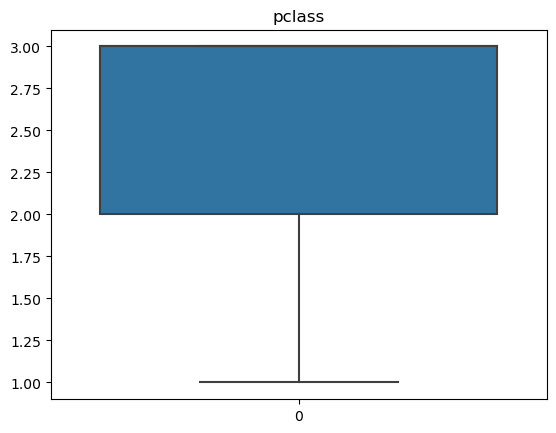

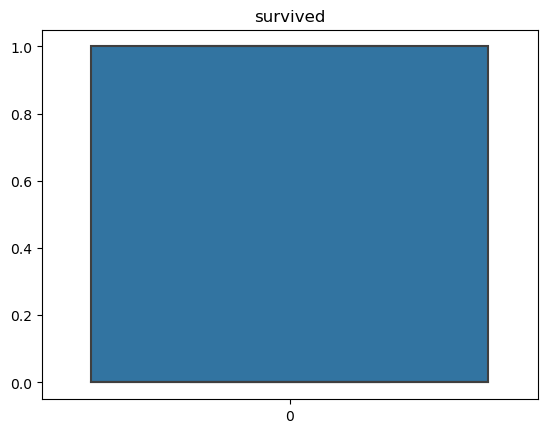

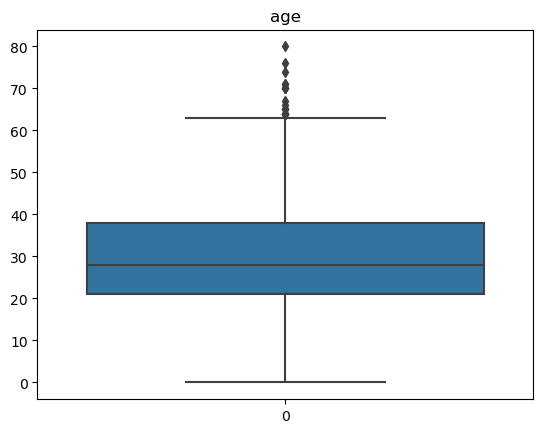

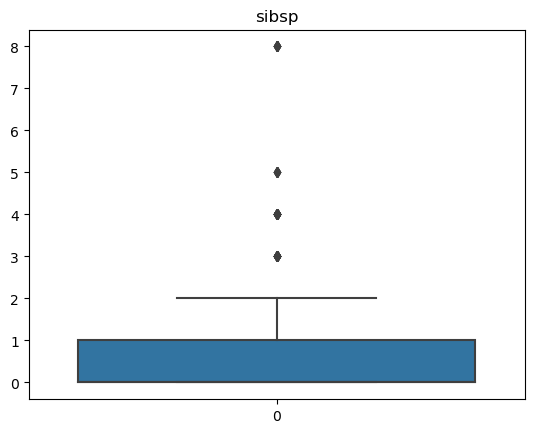

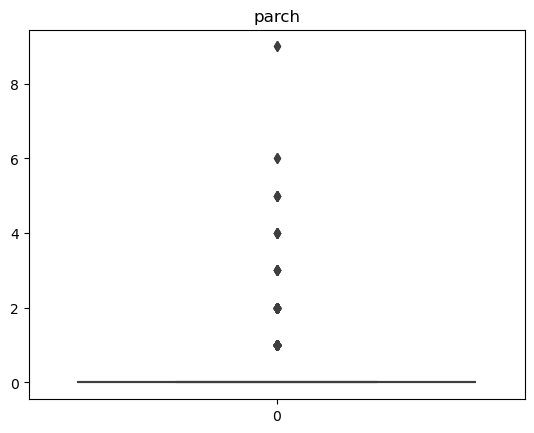

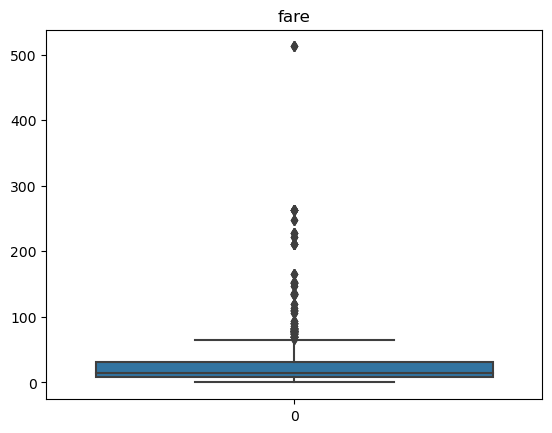

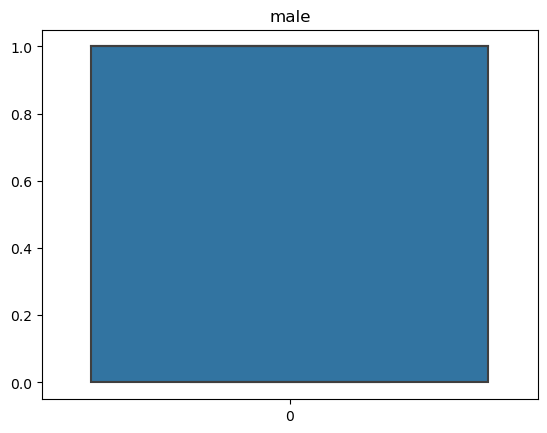

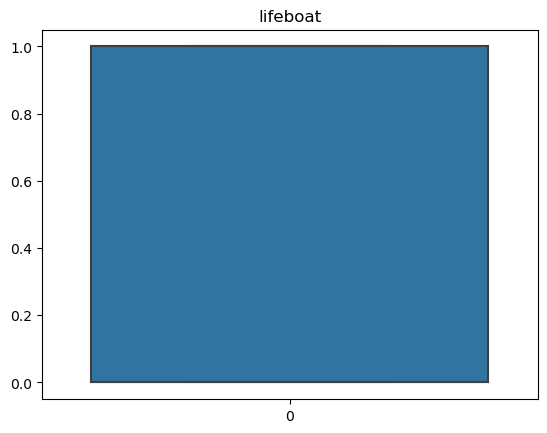

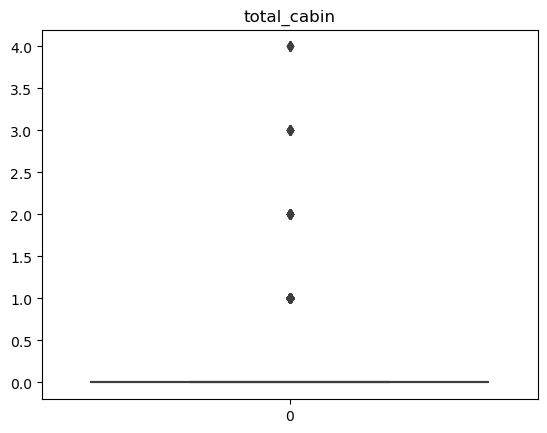

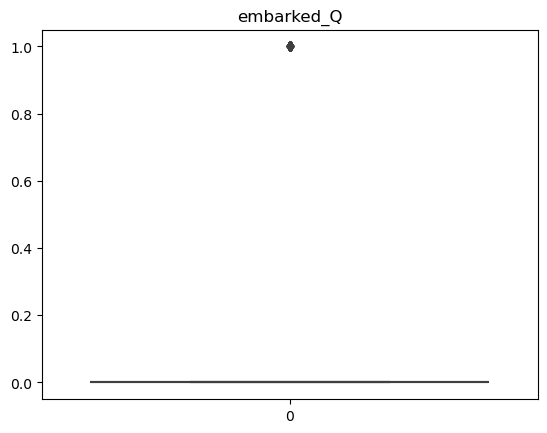

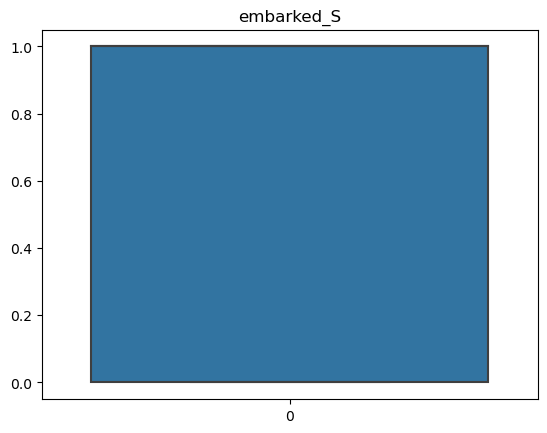

In [70]:
for col in df.columns:
    sns.boxplot(data = df[col])
    plt.title(col)
    plt.show()